In [2]:
import numpy as np
import pandas as pd
from scipy import integrateL
from scipy import stats
import dabest
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette = {'Benzo': '#8FB996', 'BL': '#594157'}

In [6]:
# Load network (NMF) data
AUC_DF = AUC_DF = pd.read_csv("Human_data/AUC_NMF.csv")
cnd = ['BL', 'Benzo']

mean_diff=-0.16, p=0e+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:559: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().loc[current_control, yvar]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:561: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().loc[current_group, yvar]


Text(1.5, 0.8, 'mean_diff=-0.16, p=0e+00')

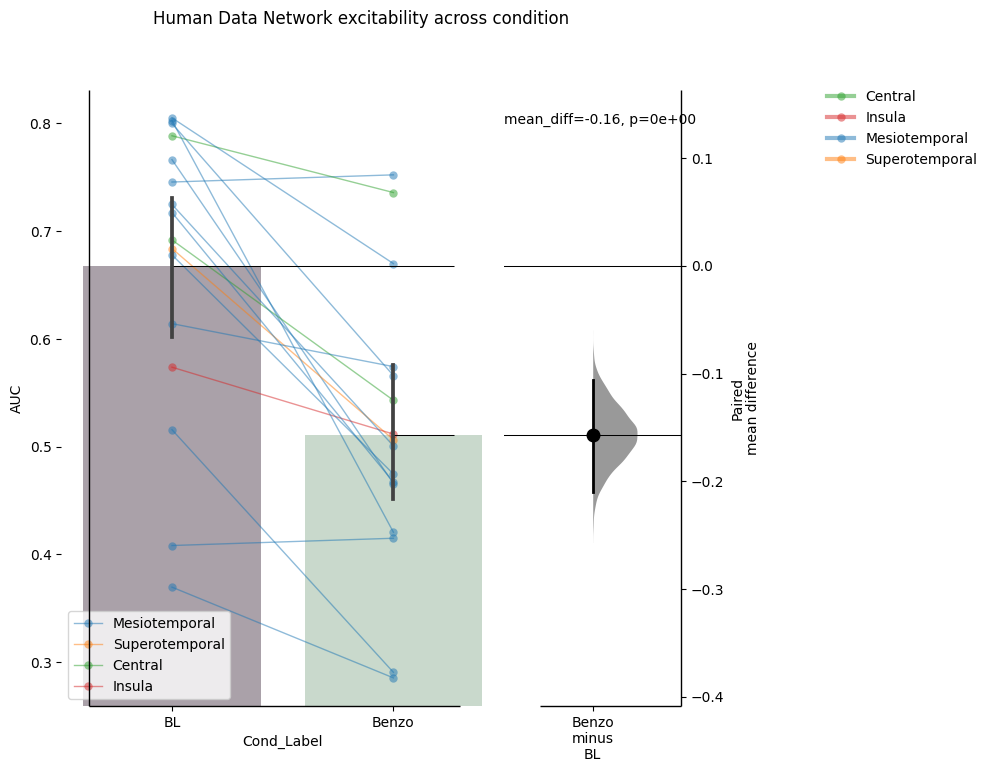

In [7]:
AUC_DF['Patient x Stim x sub-network'] = AUC_DF['Subj'] +" x " +  AUC_DF['Stim_L']  +" x "+ AUC_DF['H'].astype(str)

title= 'Human Data Network excitability across condition'
fig = plt.figure(title, figsize=(8, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
Paired_booststrap = dabest.load(AUC_DF, idx=(cnd[0], cnd[1]),x="Cond_Label", y='AUC',paired=True, id_col='Patient x Stim x sub-network')
Paired_booststrap.mean_diff.plot(ax=ax1, slopegraph_kwargs={'marker':'o','mew':0}, color_col="Area",show_pairs=True,swarm_desat=1)
a = sns.barplot(ax=ax1, data=AUC_DF, x="Cond_Label", y="AUC", alpha=0.5, order=cnd, palette=my_color_palette)

# legends without duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

stats = Paired_booststrap.mean_diff.statistical_tests
mean_diff = float(stats["difference"])
p_value = float(stats["pvalue_permutation"])
print('mean_diff={:.2f}, p={:.0e}'.format(mean_diff, p_value))

ax1.text(1.5,0.8,'mean_diff={:.2f}, p={:.0e}'.format(mean_diff, p_value))